In [108]:
import pandas as pd 
import numpy as np


In [109]:
df=pd.read_csv(r"C:\Users\MuntasirulHoque\OneDrive - ADA Global\Desktop\ML CODE\Car\Car-Acceptability-Classification-Dataset\car.csv")

In [110]:
df.head()

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [111]:
df.shape


(1728, 7)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Buying_Price       1728 non-null   object
 1   Maintenance_Price  1728 non-null   object
 2   No_of_Doors        1728 non-null   object
 3   Person_Capacity    1728 non-null   object
 4   Size_of_Luggage    1728 non-null   object
 5   Safety             1728 non-null   object
 6   Car_Acceptability  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Unique Value

In [113]:
for col in df.columns:

    print("Unique value",col,"\n",df[col].unique())

Unique value Buying_Price 
 ['vhigh' 'high' 'med' 'low']
Unique value Maintenance_Price 
 ['vhigh' 'high' 'med' 'low']
Unique value No_of_Doors 
 ['2' '3' '4' '5more']
Unique value Person_Capacity 
 ['2' '4' 'more']
Unique value Size_of_Luggage 
 ['small' 'med' 'big']
Unique value Safety 
 ['low' 'med' 'high']
Unique value Car_Acceptability 
 ['unacc' 'acc' 'vgood' 'good']


Cout of Null values

In [114]:
for col in df.columns:

    print("Number Null values : ", col,"\n",df[col].isna().sum())

Number Null values :  Buying_Price 
 0
Number Null values :  Maintenance_Price 
 0
Number Null values :  No_of_Doors 
 0
Number Null values :  Person_Capacity 
 0
Number Null values :  Size_of_Luggage 
 0
Number Null values :  Safety 
 0
Number Null values :  Car_Acceptability 
 0


# Visualizaton

In [115]:
import  matplotlib.pyplot as plt 
df_train_object=df
df_train_object=df_train_object.astype(str)
df_train_object.replace(np.nan ,'Nan',inplace=True)


In [116]:
import matplotlib.pyplot as plt 

df_train_object=df
df_train_object=df_train_object.astype(str)
df_train_object.replace(np.nan ,'Nan',inplace=True)

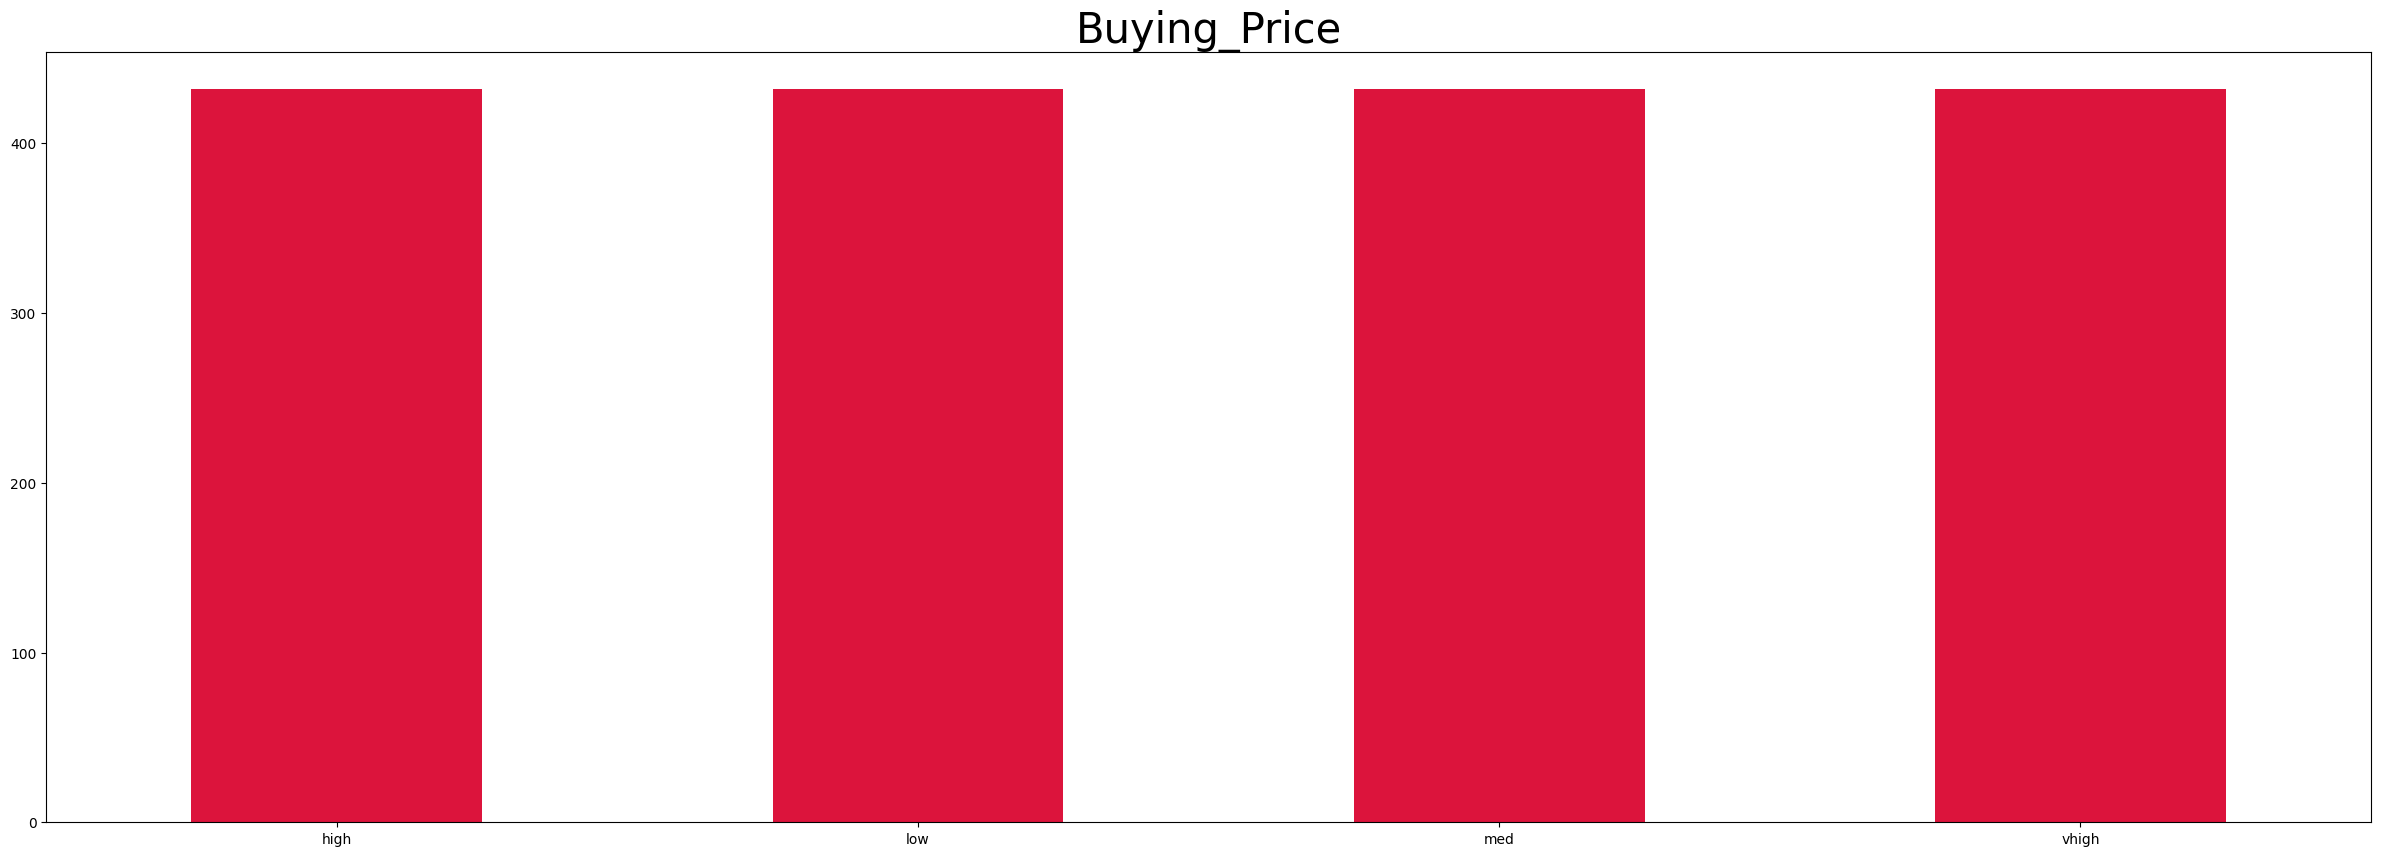

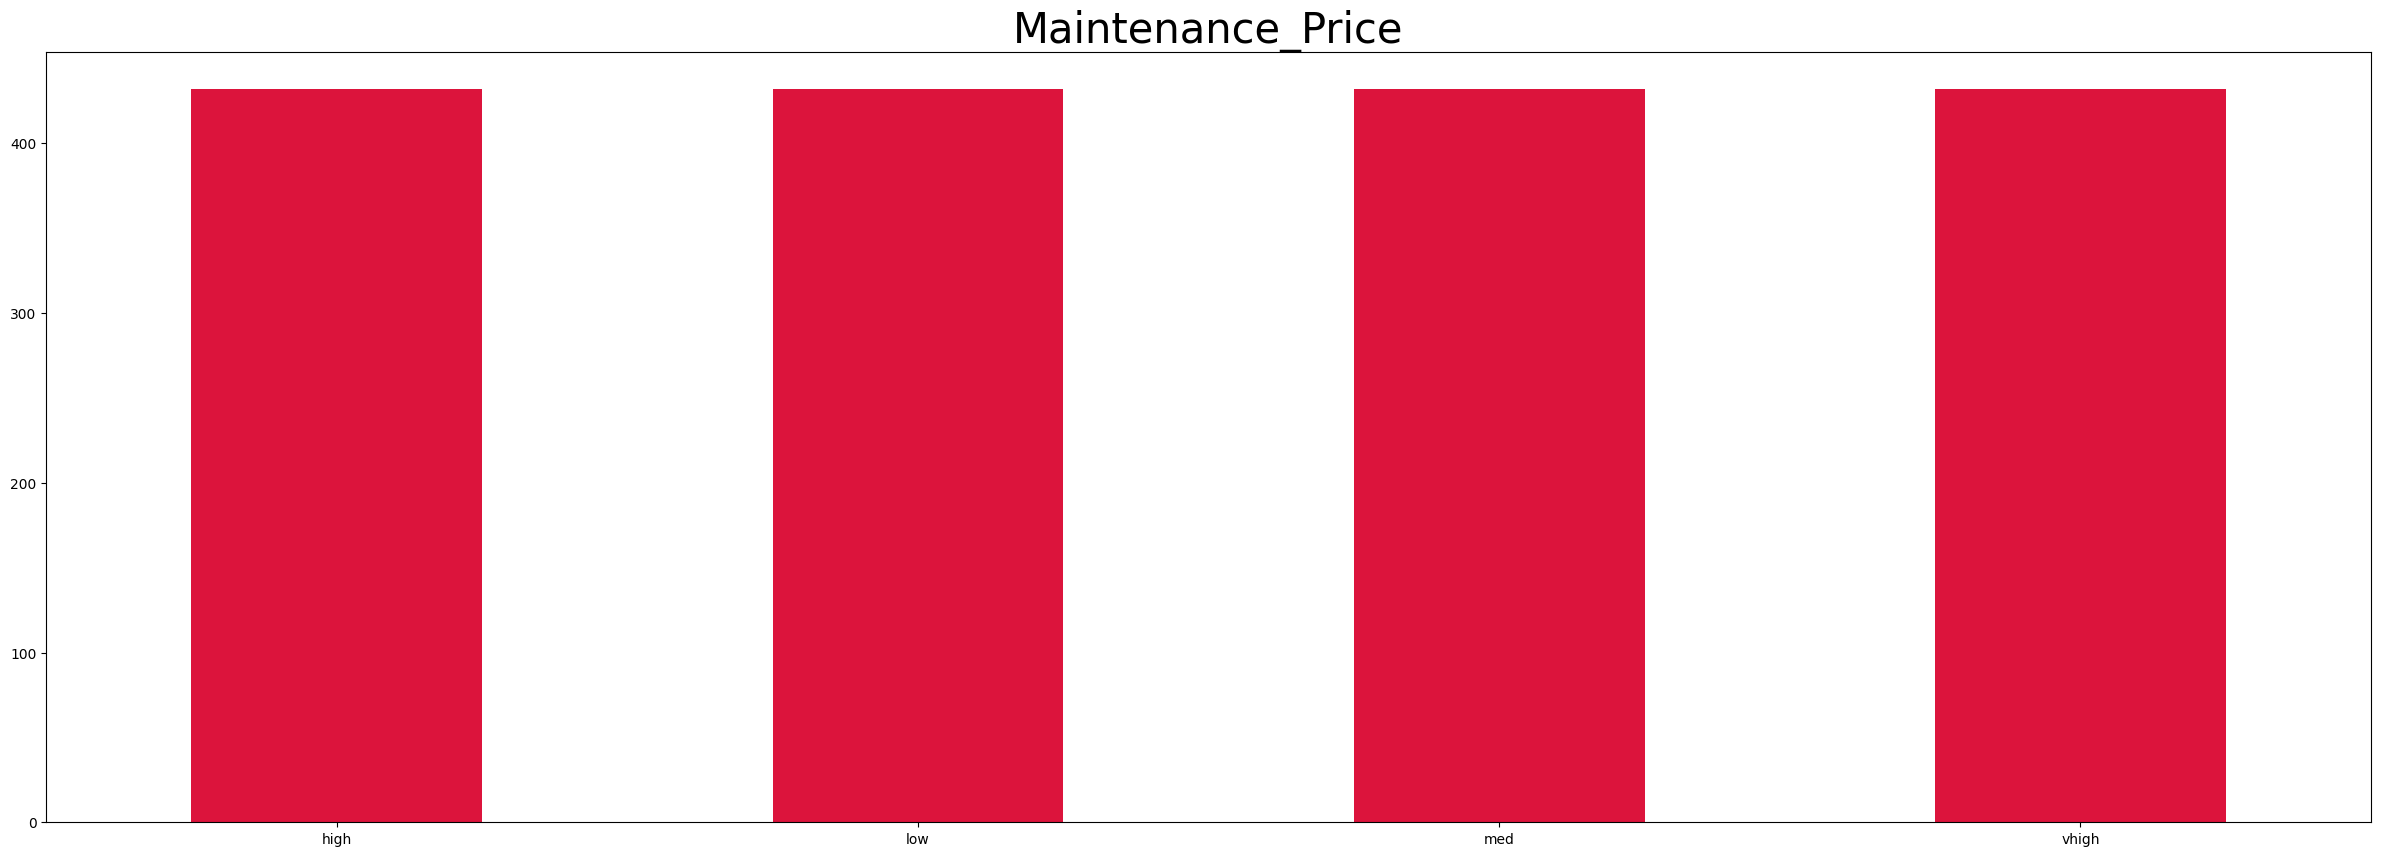

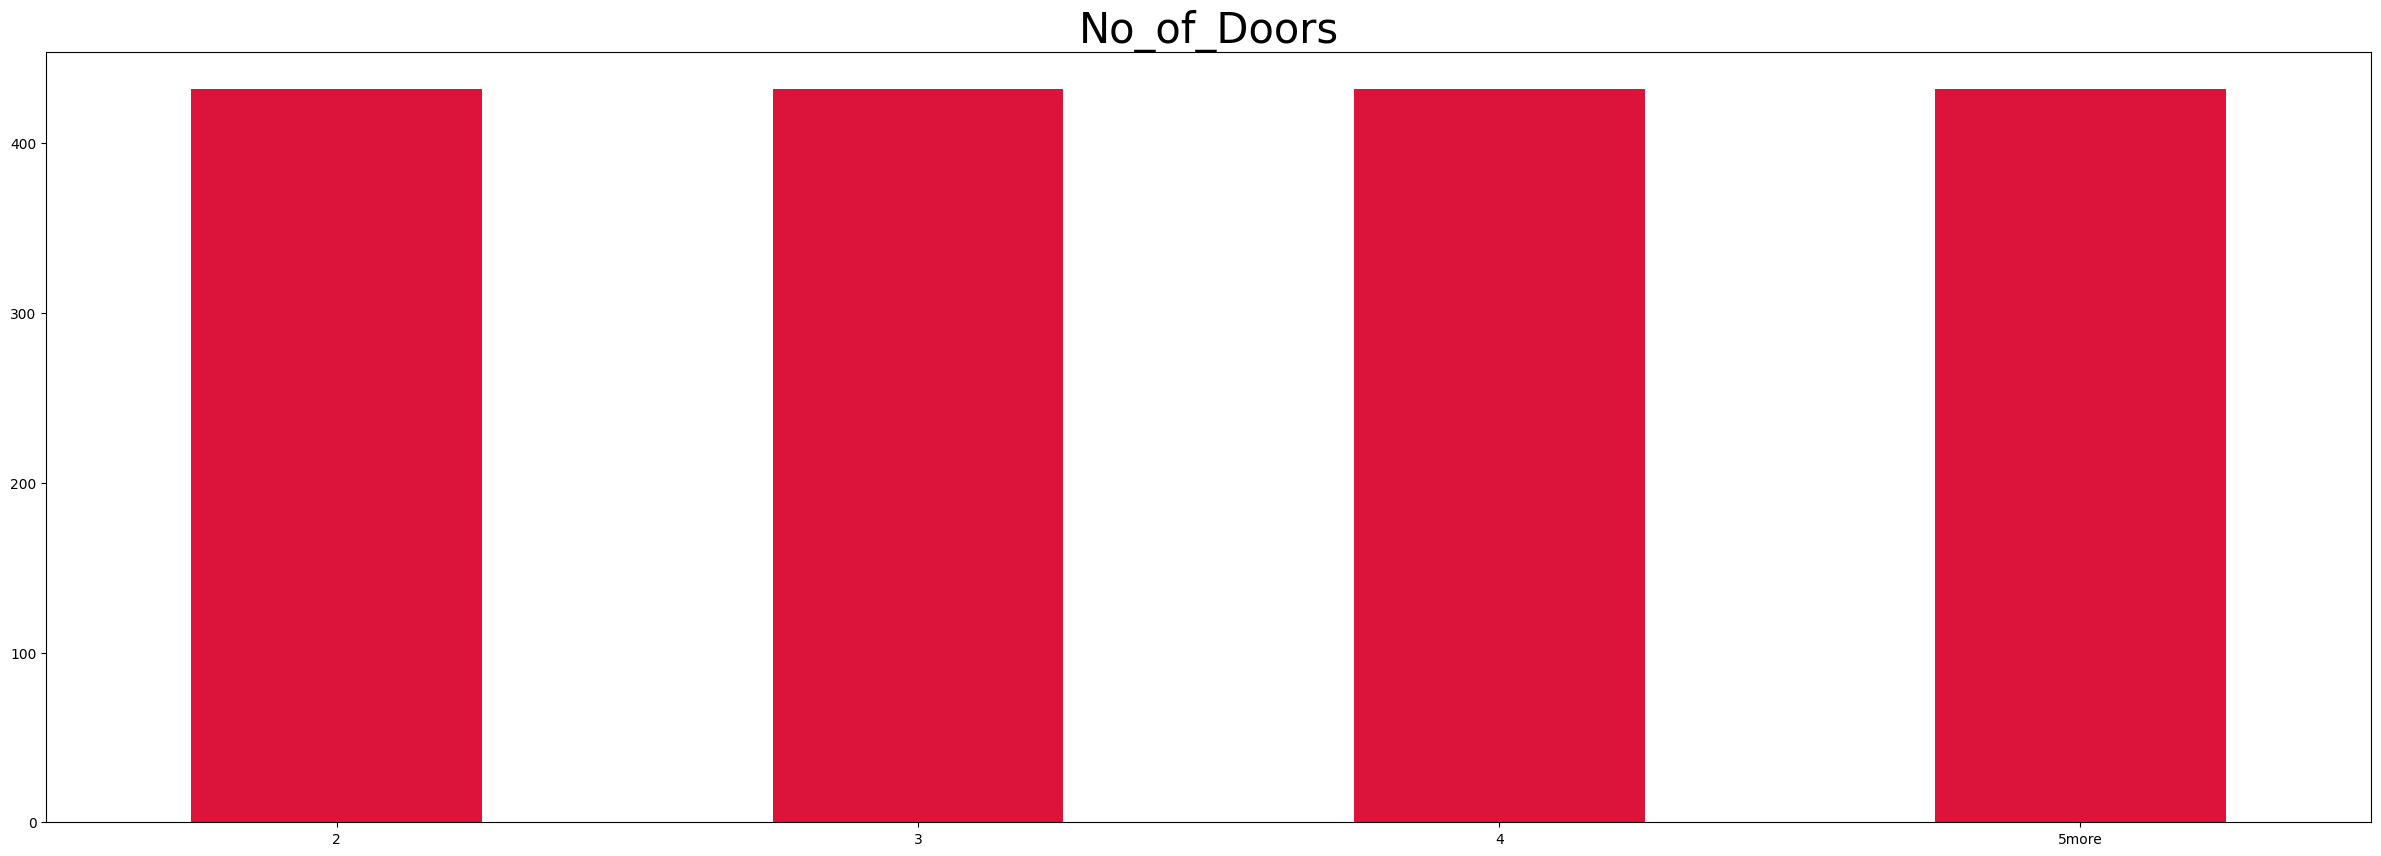

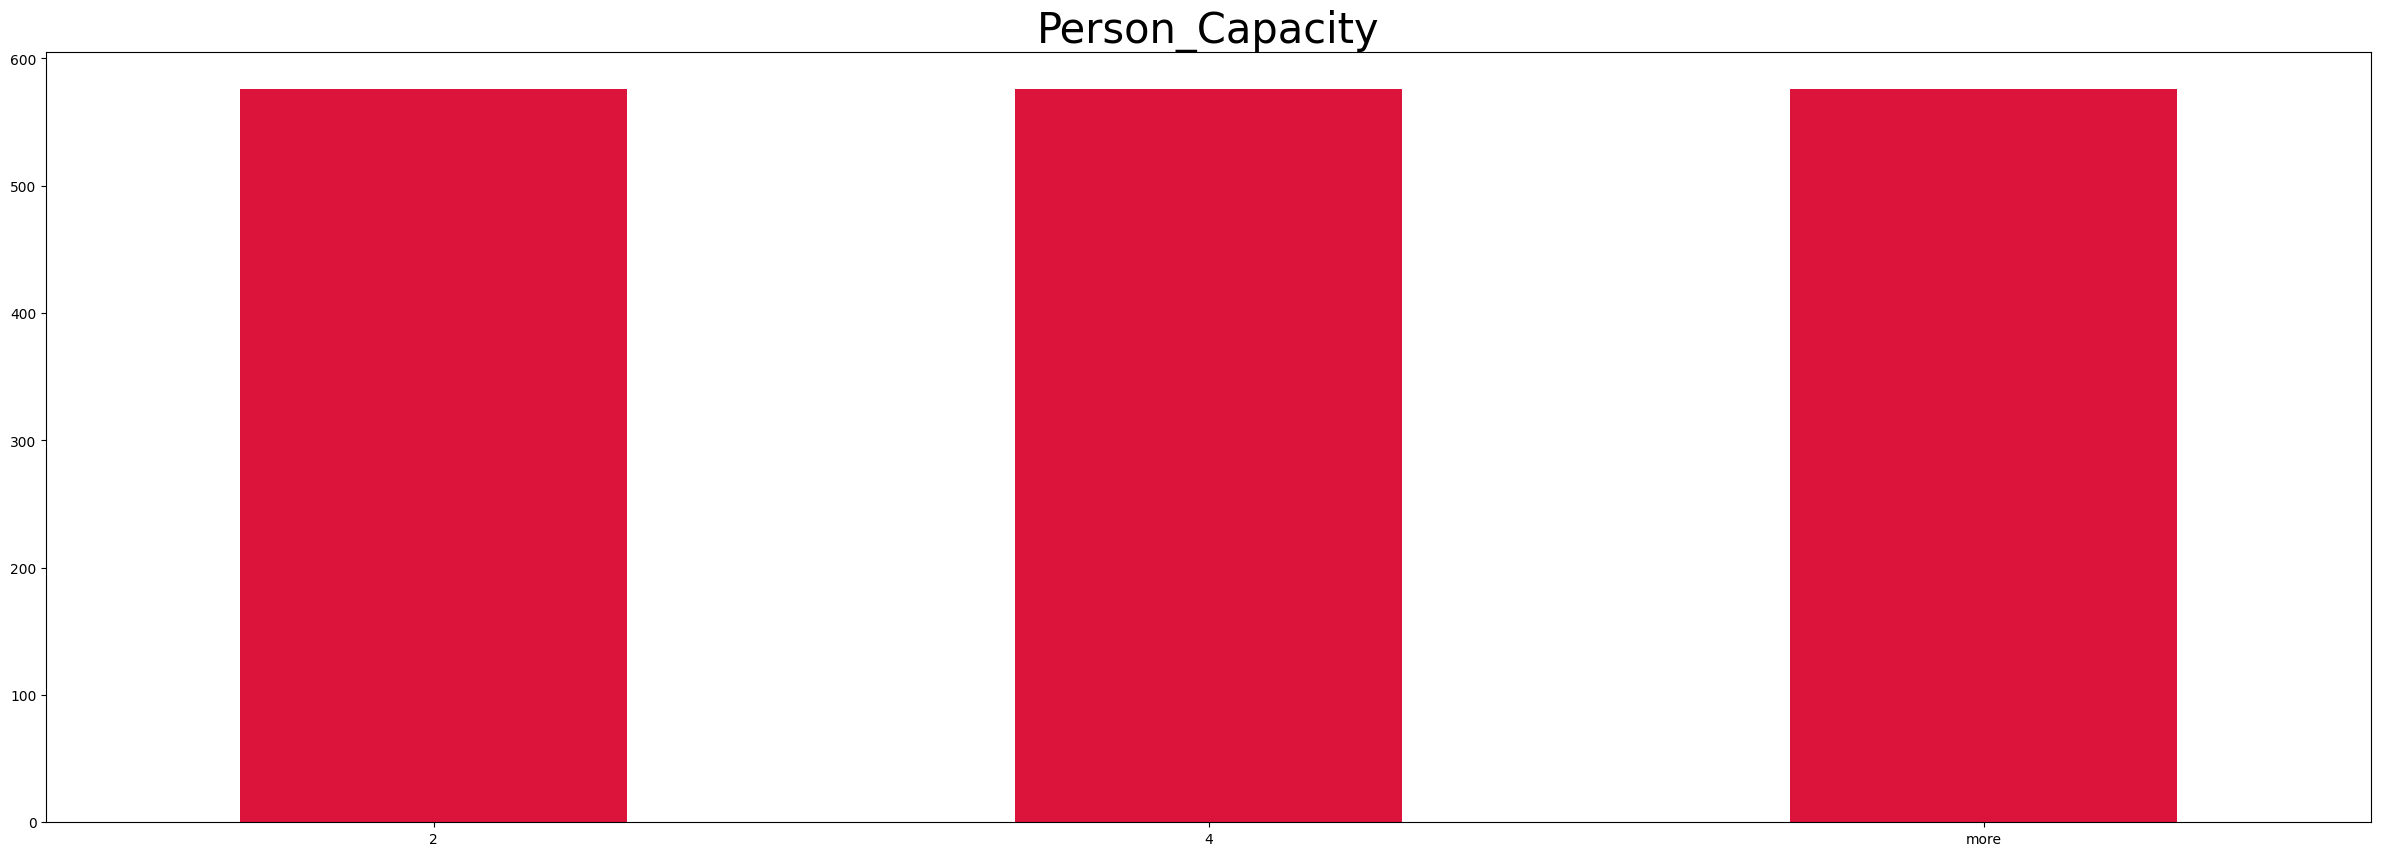

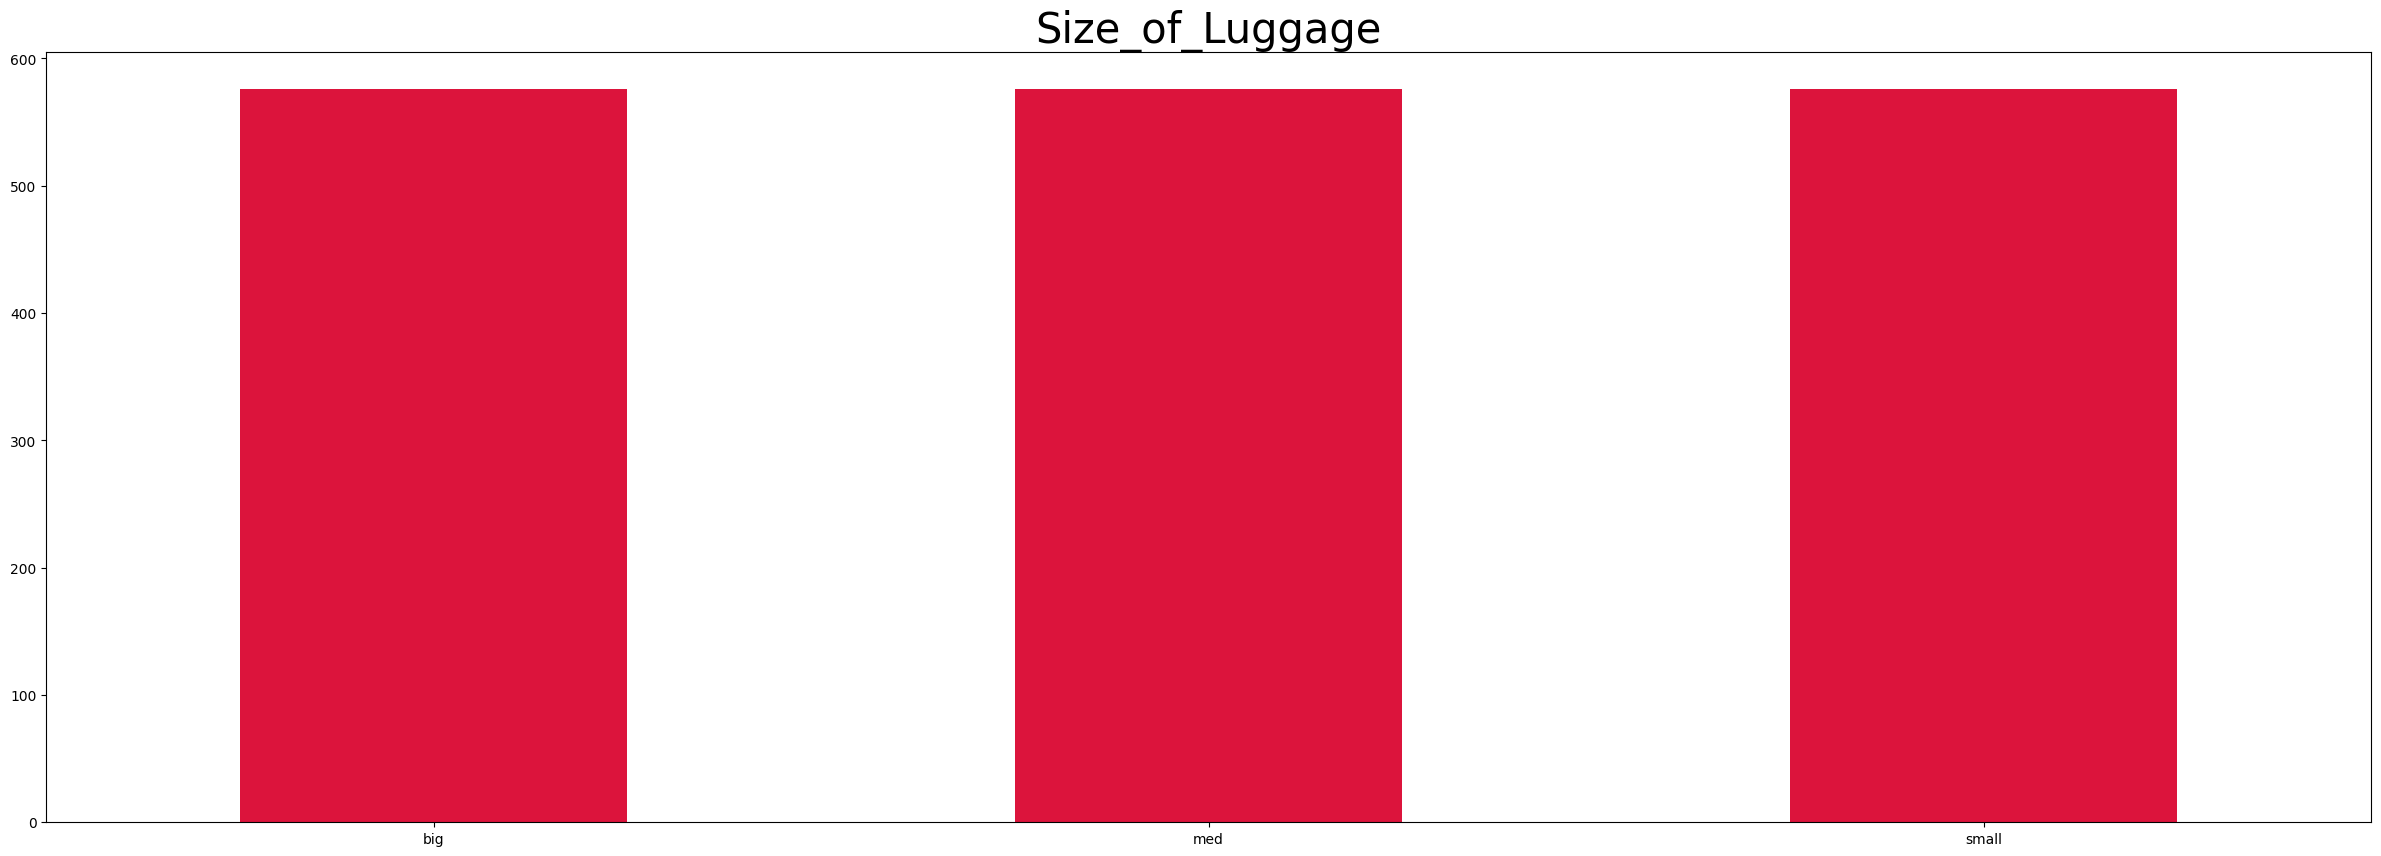

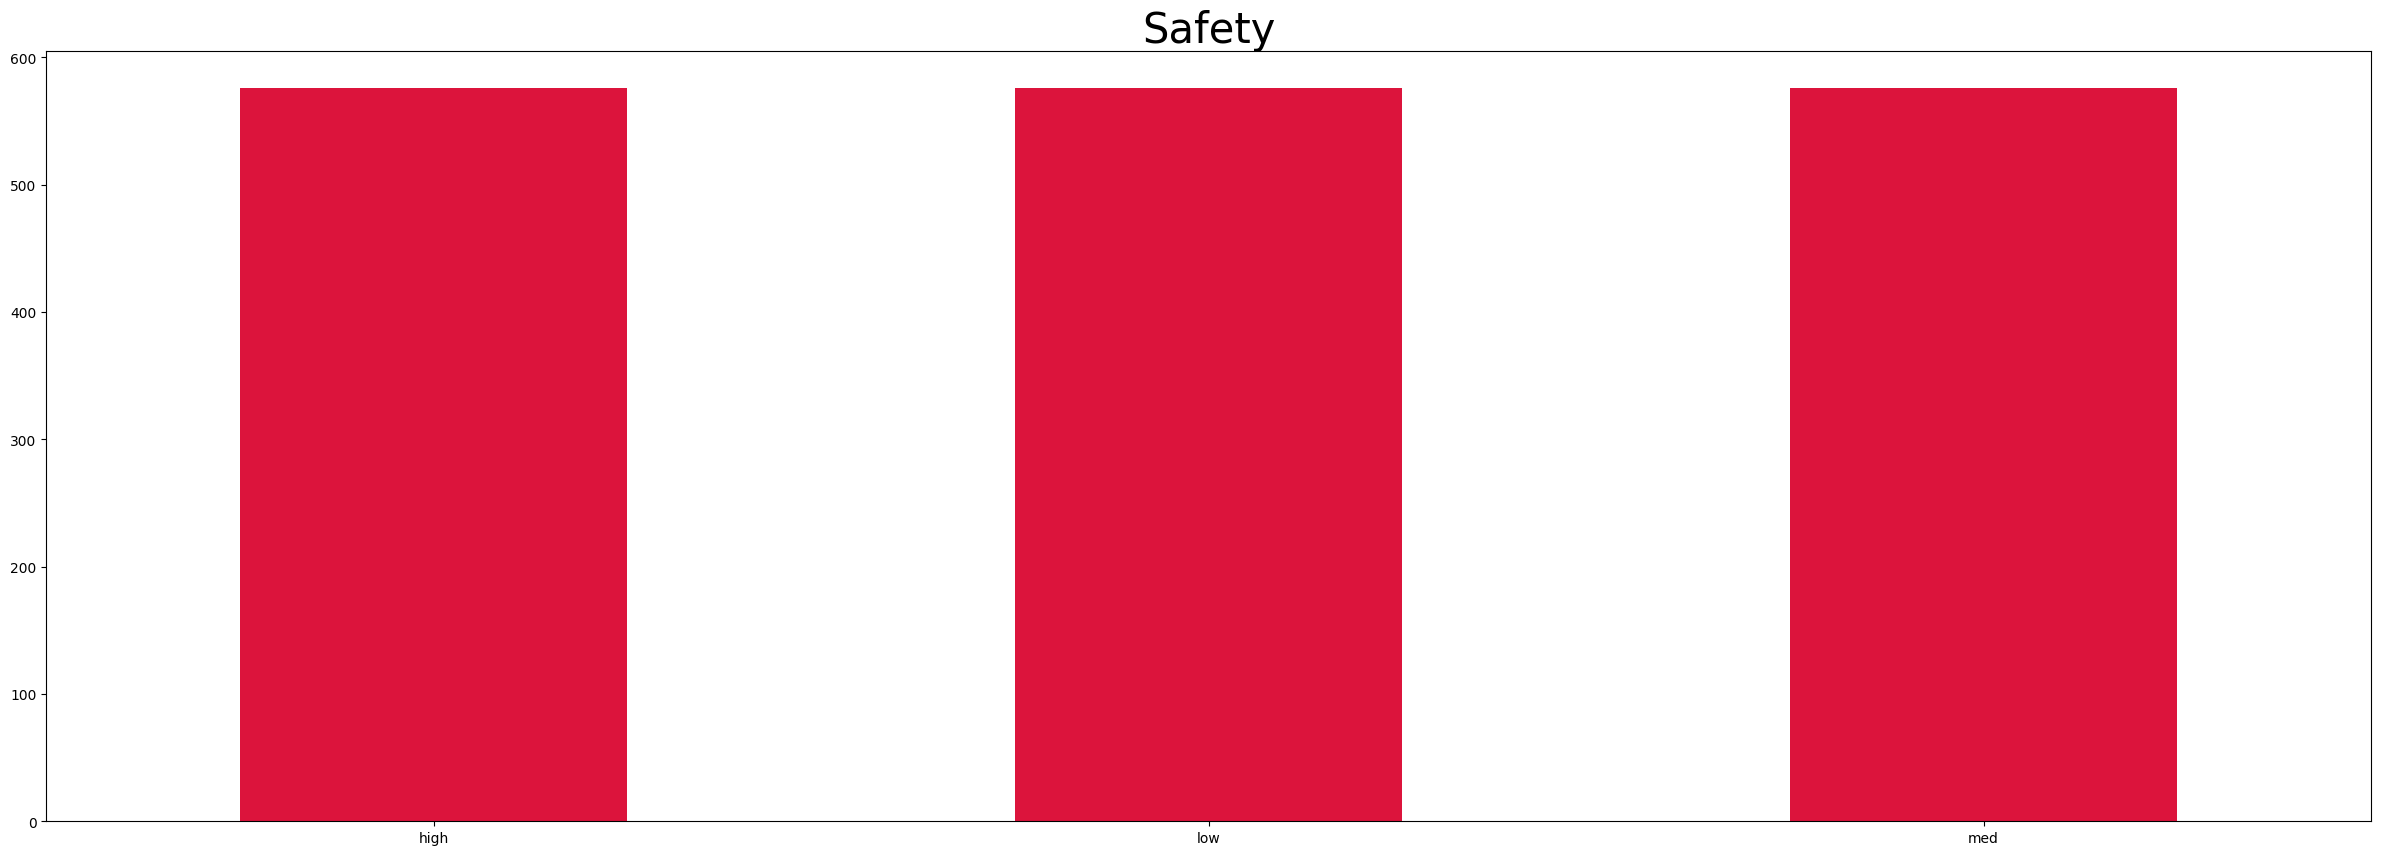

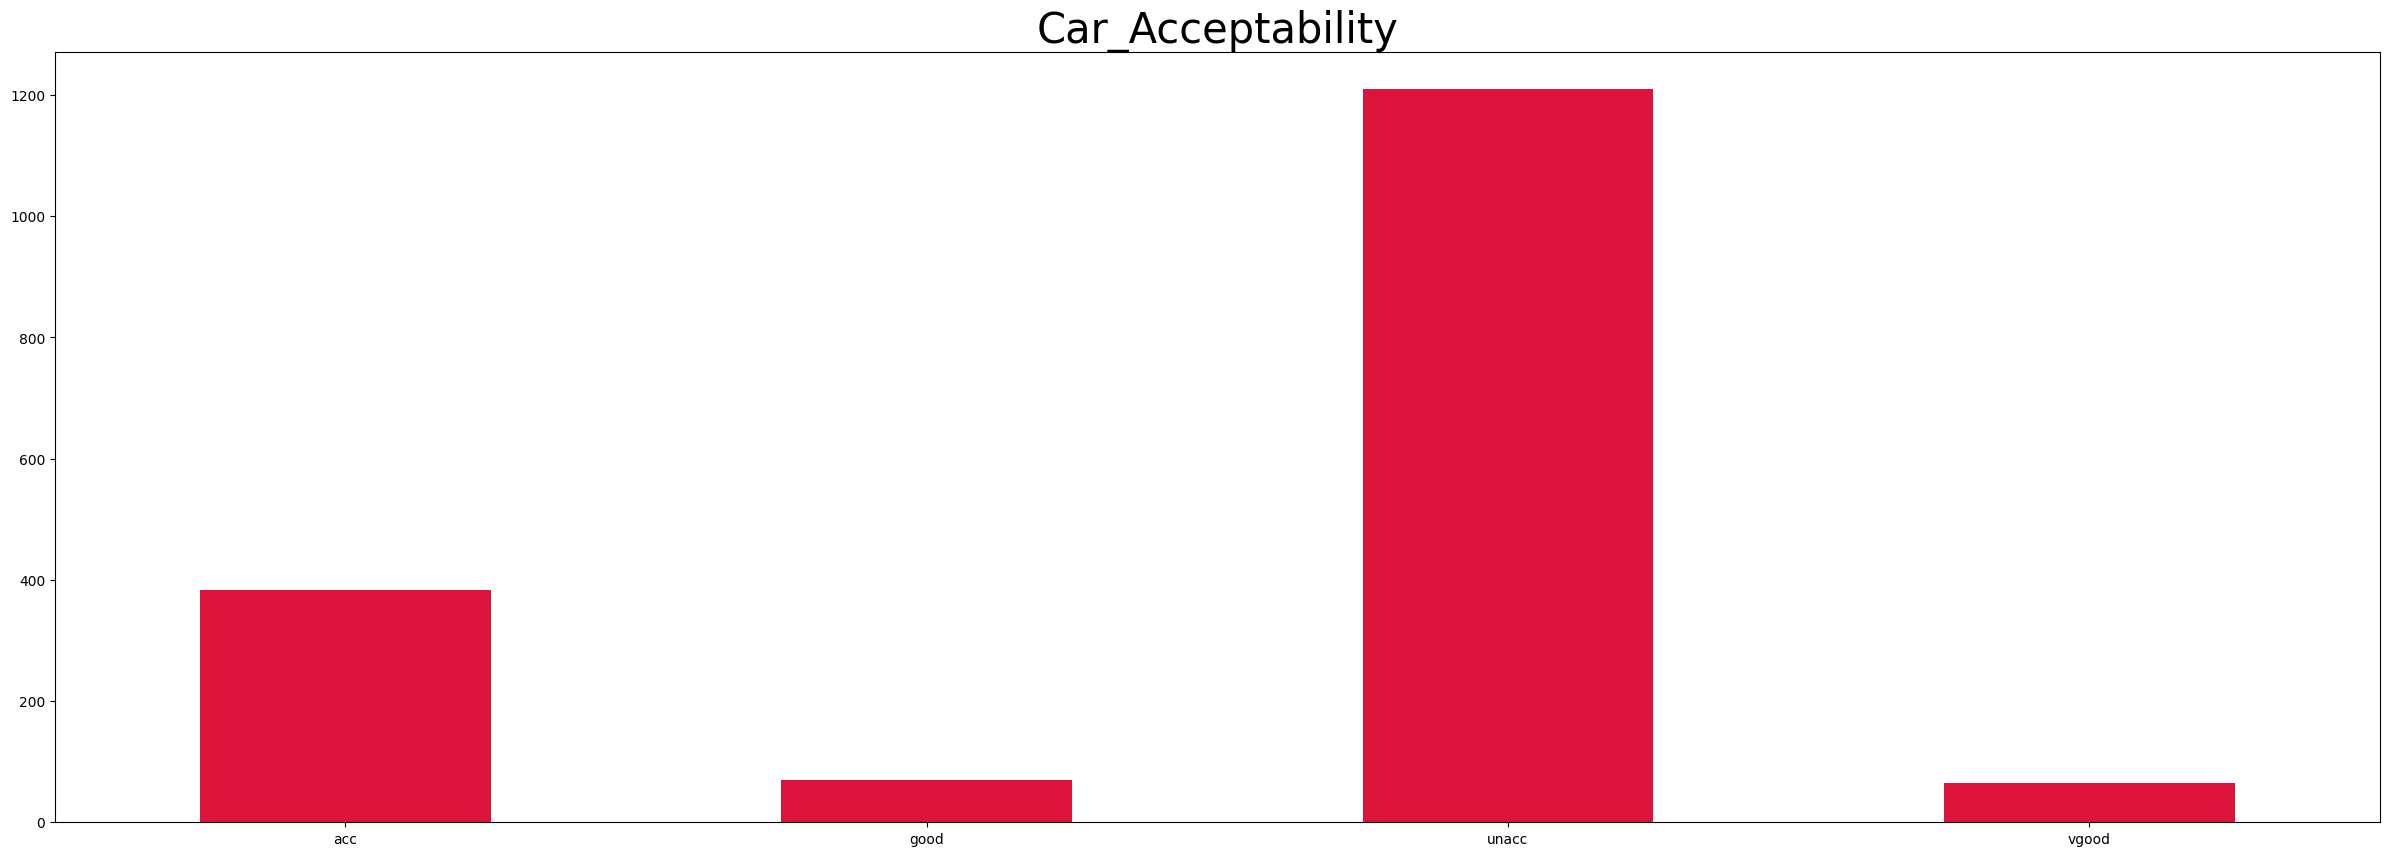

In [117]:
for col in df_train_object:
    plt.figure(figsize=(30,10))
    plt.title(col,fontsize=30)
    df_train_object[col].value_counts().sort_index().plot(kind='bar',rot=0 , color="crimson")
    plt.show()


In [118]:
for col in df.columns:

    print("Unique value",col,"\n",df[col].unique())

Unique value Buying_Price 
 ['vhigh' 'high' 'med' 'low']
Unique value Maintenance_Price 
 ['vhigh' 'high' 'med' 'low']
Unique value No_of_Doors 
 ['2' '3' '4' '5more']
Unique value Person_Capacity 
 ['2' '4' 'more']
Unique value Size_of_Luggage 
 ['small' 'med' 'big']
Unique value Safety 
 ['low' 'med' 'high']
Unique value Car_Acceptability 
 ['unacc' 'acc' 'vgood' 'good']


In [119]:
df["Buying_Price"].replace({'vhigh':3, 'high':2,'med':1 ,'low':0},inplace=True)
df["Maintenance_Price"].replace({'vhigh':3, 'high':2,'med':1 ,'low':0},inplace=True)
df["No_of_Doors"].replace({'5more': 5},inplace=True)
df["Person_Capacity"].replace({'more':5},inplace=True)
df["Size_of_Luggage"].replace({'small':0, 'med':1 , 'big':2},inplace=True)
df["Safety"].replace({'low':0,'med':1, 'high':3},inplace=True)
df["Car_Acceptability"].replace({'unacc':0, 'acc':1, 'vgood':3, 'good':4},inplace=True)

In [120]:
df.head()

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,3,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0


In [121]:
df["Car_Acceptability"].value_counts()

0    1210
1     384
4      69
3      65
Name: Car_Acceptability, dtype: int64

In [122]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = 'Car_Acceptability')
y = df['Car_Acceptability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [123]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [124]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline

lda_pipe = Pipeline ([
    ('scaler', StandardScaler()),
    ('lda', LDA())
])

qda_pipe = Pipeline ([
    ('scaler', StandardScaler()),
    ('qda', QDA())
])

svm_pipe = Pipeline ([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

pipa = [lda_pipe, qda_pipe, svm_pipe]

best_model = None
best_f1_score = ""

for pipeline in pipa:
    pipeline.fit (X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    report = classification_report(y_test, y_pred)
    
    if report > best_f1_score:
        best_f1_score = report
        best_model = pipeline

print(f"The best model is {best_model.named_steps['svm'].__class__.__name__} with the following classification report:\n{best_f1_score}")

The best model is SVC with the following classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       358
           1       0.96      0.92      0.94       118
           3       0.88      0.92      0.90        24
           4       0.84      0.84      0.84        19

    accuracy                           0.97       519
   macro avg       0.92      0.92      0.92       519
weighted avg       0.97      0.97      0.97       519



In [125]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1]}
random_opt = RandomizedSearchCV(SVC(), param_grid, cv=stratified_cv)
random_opt.fit(X_train, y_train)
print("Hyperparameter terbaik:", random_opt.best_params_)

# Mengevaluasi model pada set pengujian
accuracy = random_opt.score(X_test, y_test)
print("Akurasi model terbaik:", accuracy)

Hyperparameter terbaik: {'gamma': 0.1, 'C': 100}
Akurasi model terbaik: 0.9730250481695568


In [126]:
svc = SVC()
svc.set_params(gamma = 0.1)
svc.set_params(C = 10)

svm_pipe = Pipeline ([
    ('scaler', StandardScaler()),
    ('svm', svc)
])

svm_pipe.fit(X_train, y_train)
y_pred = svm_pipe.predict (X_test)

report = classification_report(y_test, y_pred)

print (report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       358
           1       0.96      0.89      0.93       118
           3       0.88      0.96      0.92        24
           4       0.77      0.89      0.83        19

    accuracy                           0.96       519
   macro avg       0.90      0.93      0.92       519
weighted avg       0.96      0.96      0.96       519



<Axes: >

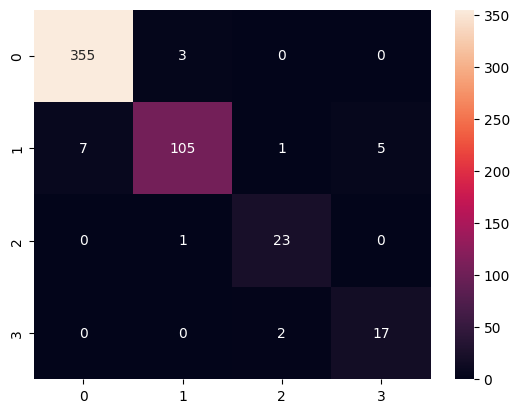

In [127]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')

In [128]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [129]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline

lda_pipe=Pipeline([

    ('scaler',StandardScaler()),
    ('lda',LDA())

])
qda_pipe=Pipeline([

    ('scaler',StandardScaler()),
    ('qda',QDA())

])
svm_pipe=Pipeline([

    ('scaler',StandardScaler()),
    ('svm',SVC())

])

pipe=[lda_pipe,qda_pipe,svm_pipe]

best_model=None
best_f1_score=""

for pipeline in pipe:

    pipeline.fit(X_train,y_train)
    y_pred=pipeline.predict(X_test)

    report=classification_report(y_test,y_pred)

    if report > best_f1_score:
        best_f1_score=report
        best_model=pipeline

print(f"The best model is {best_model.named_steps['svm'].__class__.__name__} with the following classification report:\n{best_f1_score}")

The best model is SVC with the following classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       358
           1       0.96      0.92      0.94       118
           3       0.88      0.92      0.90        24
           4       0.84      0.84      0.84        19

    accuracy                           0.97       519
   macro avg       0.92      0.92      0.92       519
weighted avg       0.97      0.97      0.97       519



# Hyperparameter Tuning SVC

In [130]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedGroupKFold

stratified_cv=StratifiedGroupKFold(n_splits=5,shuffle=True,random_state=42)


param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1]}
random_opt = RandomizedSearchCV(SVC(), param_grid, cv=stratified_cv)
random_opt.fit(X_train, y_train)
print("Hyperparameter terbaik:", random_opt.best_params_)


accuracy = random_opt.score(X_test, y_test)
print("Accuracy of the Model :", accuracy)

Hyperparameter terbaik: {'gamma': 0.1, 'C': 1}
Accuracy of the Model : 0.9479768786127167


In [131]:
svc = SVC()
svc.set_params(gamma = 0.1)
svc.set_params(C = 10)

svm_pipe = Pipeline ([
    ('scaler', StandardScaler()),
    ('svm', svc)
])

svm_pipe.fit(X_train, y_train)
y_pred = svm_pipe.predict (X_test)

report = classification_report(y_test, y_pred)

print (report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       358
           1       0.96      0.89      0.93       118
           3       0.88      0.96      0.92        24
           4       0.77      0.89      0.83        19

    accuracy                           0.96       519
   macro avg       0.90      0.93      0.92       519
weighted avg       0.96      0.96      0.96       519



# Confusion Matrix


<Axes: >

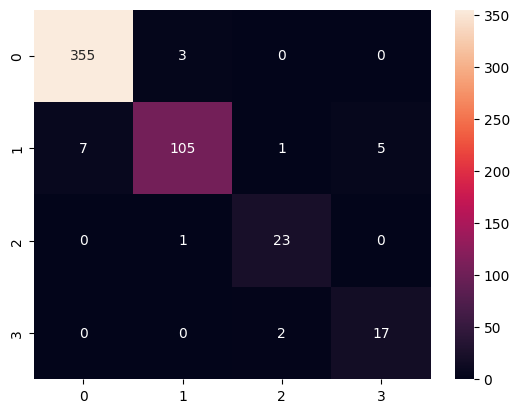

In [132]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')